# Trabalho 3

RA: 184849  
Naomi Takemoto

In [1]:
# Import dependencies
import numpy as np
from skimage import morphology
import cv2
from cv2 import connectedComponentsWithStats
from utils import *

np.printoptions(precision=4)
try:
    %matplotlib qt5
except:
    %matplotlib

Visualiza o dado de entrada

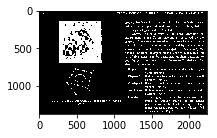

Min: 0
Max: 1
Mean: 0.15326995947384442


In [2]:
# load input
image_dir = 'data'
image, image_name = load_images(image_dir)
image = image[0]

# Save as .png
if not os.path.exists('png_images'):
    os.makedirs('png_images')
cv2.imwrite('png_images/input.png', image)

# From 0 - 255 to 0 -1
image = np.array(np.where(image == 255, 0, 1))
plot_image(image)

**Passo 1**: (1) dilatacão da imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura  

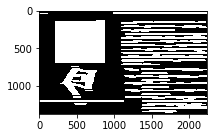

Min: False
Max: True
Mean: 0.391413761162293


True

In [3]:
s_e1  = np.ones((1,100))
output1 = morphology.binary_dilation(image,s_e1)

plot_image(output1)

# Save pbm
save_pbm('pbm_images/step1.pbm', output1)

# Save png
output1_png = np.where(output1==1, 0, 255) 
output1_png = output1_png.astype(np.uint8)
cv2.imwrite('png_images/step1.png', output1_png)

**Passo 2:** erosão da imagem resultante com o mesmo elemento estruturante do passo (1);

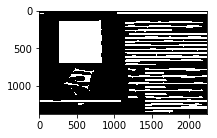

Min: False
Max: True
Mean: 0.3000037156037758


True

In [4]:
output2 = morphology.binary_erosion(output1,s_e1)
plot_image(output2)

# Save pbm
save_pbm('pbm_images/step2.pbm', output2)

# Save png
cv2.imwrite('png_images/step2.png',(np.where(output2==0, 255, 0)).astype('uint8'))

**Passo 3:** dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura;

In [5]:
s_e3 = np.ones((200,1))
output3 = morphology.binary_dilation(image,s_e3)

# Save pbm
save_pbm('pbm_images/step3.pbm', output3)

# Save png
cv2.imwrite('png_images/step3.png',(np.where(output3==0, 255, 0)).astype('uint8'))


True

**Passo 4:** erosão da imagem resultante com o mesmo elemento estruturante do passo (3);

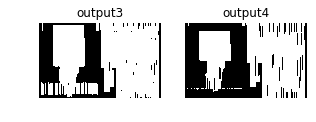

True

In [6]:
output4 = morphology.binary_erosion(output3,s_e3)
plot_images([output3,output4],['output3','output4'])


# Save pbm
save_pbm('pbm_images/step4pbm', output3)

# Save png
cv2.imwrite('png_images/step4.png',(np.where(output4==0, 255, 0)).astype('uint8'))

**Passo 5:** aplicacao da intersecçao (AND) dos resultados dos passos (2) e (4) 

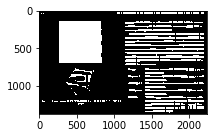

Min: False
Max: True
Mean: 0.27841833917726105


True

In [7]:
output5= np.logical_and(output2,output4) 
plot_image(output5)


# Save pbm
save_pbm('pbm_images/step5.pbm', output2)

# Save png
cv2.imwrite('png_images/step5.png',(np.where(output5==0, 255, 0)).astype('uint8'))

**Passo 6:** fechamento do resultado obtido no psso (5) com um elemento estruturante de 1 pixel de altura e 30pixels de largura

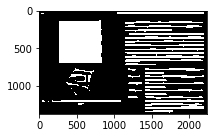

Min: False
Max: True
Mean: 0.29078543300798987


True

In [8]:
s_e6 = np.ones((1,30))
output6 = morphology.binary_closing(output5,s_e6)
plot_image(output6)

# Save pbm
save_pbm('pbm_images/step6.pbm', output6)

# Save png
cv2.imwrite('png_images/step6.png',(np.where(output6==0, 255, 0)).astype('uint8'))

**Passo 7:** aplicação de algoritmo para identificação de componentes conexos (ver programa fornecido) sobre o resultado do passo (6);

In [9]:
os.system("./comp_conexos.o pbm_images/step6.pbm pbm_images/comp_step6.pbm > comp_results.txt")
! cat comp_results.txt


Image size (width x height): 2233 x 1374  pixels

Number of connected components: 56


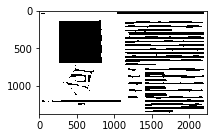

Min: 0
Max: 255
Mean: 176.56810701721108


True

In [10]:
output7 = cv2.imread('pbm_images/comp_step6.pbm',0)
plot_image(output7)

# Save as png
cv2.imwrite('png_images/step7.png', output7.astype('uint8'))

**Passo 8:** para cada retângulo envolvendo um objeto, calcule:  
* **(a)** razão entre o número de pixels pretos e o n´umero total de pixels (altura × largura);  
* **(b)** razão entre o número de transi¸c˜oes verticais e horizontais branco para preto e o número total de  
pixels pretos;
---
* cv2.CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
* cv2.CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
* cv2.CC_STAT_WIDTH The horizontal size of the bounding box
* cv2.CC_STAT_HEIGHT The vertical size of the bounding box
* cv2.CC_STAT_AREA The total area (in pixels) of the connected component

In [11]:
output6 = cv2.imread('pbm_images/step6.pbm', 0)
output6 = np.where(output6 == 0, 1, 0).astype('uint8')

shape = output6.shape
retval, labels, stats, centroids = connectedComponentsWithStats(output6,connectivity=4)
output6 = np.where(output6==1,0,1)

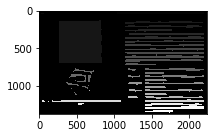

Min: 0
Max: 56
Mean: 4.900424752179006
Number of components: 57


In [12]:
n_components = len(stats)
output7 = labels
plot_image(output7)

print('Number of components:', n_components)

In [13]:
# step 8a
black_ratio = []
n_black = []
for component_index in range(len(stats)):
    x = stats[component_index,cv2.CC_STAT_LEFT]
    y = stats[component_index,cv2.CC_STAT_TOP]
    width = stats[component_index,cv2.CC_STAT_WIDTH]
    height = stats[component_index,cv2.CC_STAT_HEIGHT]
    area = stats[component_index,cv2.CC_STAT_AREA]
    window = output6[y:y+height, x:x+width]
    n_white_pixels = (window==1).sum()
    n_black_pixels = (window==0).sum()
    total = n_white_pixels + n_black_pixels
    print('black/area:', n_black_pixels/total, 'white: ', n_white_pixels, 'black: ', n_black_pixels)
    black_ratio.append(n_black_pixels/total)
    n_black.append(n_black_pixels)

black/area: 0.29078543300798987 white:  2175971 black:  892171
black/area: 0.840729800173762 white:  4583 black:  24192
black/area: 0.9693877551020408 white:  27 black:  855
black/area: 0.75 white:  2 black:  6
black/area: 1.0 white:  0 black:  2
black/area: 0.9755739669829973 white:  7907 black:  315805
black/area: 0.6216809933142311 white:  15844 black:  26036
black/area: 0.6603629417382999 white:  14224 black:  27656
black/area: 0.6612325403534195 white:  8416 black:  16427
black/area: 0.6891788766788767 white:  12219 black:  27093
black/area: 0.5965887404580152 white:  16911 black:  25009
black/area: 0.9 white:  2 black:  18
black/area: 0.5868264940922685 white:  16855 black:  23939
black/area: 0.85 white:  3 black:  17
black/area: 0.660792741165234 white:  14206 black:  27674
black/area: 0.5999044890162368 white:  16756 black:  25124
black/area: 0.6666507177033493 white:  13934 black:  27866
black/area: 0.6305684128033698 white:  15085 black:  25748
black/area: 0.7249038767663409 

57


Text(0,0.5,'frequencia')

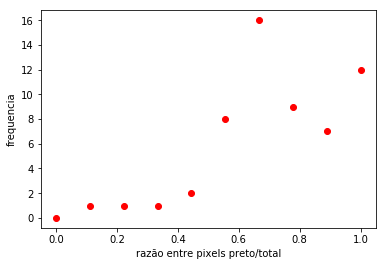

In [14]:
import math
print(len(black_ratio))
bins = np.linspace(0,1,num=10)
freq = np.zeros((10,1))
for i in range(len(black_ratio)):
    freq[min(int(float(black_ratio[i])*10),9)] += 1
plt.plot(bins, freq,'ro')
plt.xlabel('razão entre pixels preto/total')
plt.ylabel('frequencia')

**Passo 8b**

In [15]:
# step 8b
# black_ratio = []
def step8(bin_image, stats):
    v_transitions = []
    h_transitions = []

    # Add padding to the array
    temp = np.pad(bin_image,1,'constant', constant_values=1)
    for component_index in range(len(stats)):

        x = stats[component_index,cv2.CC_STAT_LEFT]
        y = stats[component_index,cv2.CC_STAT_TOP]
        x += 1
        y += 1 
        width = stats[component_index,cv2.CC_STAT_WIDTH]
        height = stats[component_index,cv2.CC_STAT_HEIGHT]
        original_window = temp[y:y+height, x:x+width]

        v_trans_window = temp[y:y+height, (x-1):(x+width-1)]
        h_trans_window = temp[y-1:y+height-1,x:x+width]
        n_vert_transitions = ((original_window-v_trans_window)==-1).sum()
        n_horiz_transitions = ((original_window-h_trans_window)==-1).sum()
        h_transitions.append(n_horiz_transitions)
        v_transitions.append(n_vert_transitions)


    v_transitions = np.array(v_transitions)
    h_transitions = np.array(h_transitions)
    return v_transitions, h_transitions

Visualiza uma componete conexa, ela deve aparecer em preto com fundo branco.

In [16]:
v_transitions, h_transitions = step8(output6, stats)

Component 1:  0.11540745398022983


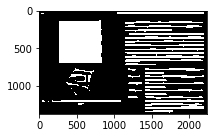

Min: 0
Max: 255
Mean: 74.15028541703741
Component 2:  0.031141868512110725


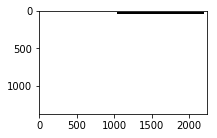

Min: 0
Max: 255
Mean: 252.9893499062299
Component 3:  0.5


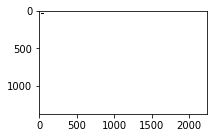

Min: 0
Max: 255
Mean: 254.92893907778713
Component 4:  2.0


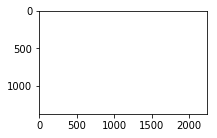

Min: 0
Max: 255
Mean: 254.99950132686166
Component 5:  0.5


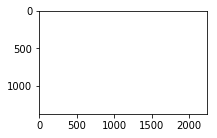

Min: 0
Max: 255
Mean: 254.99983377562054
Component 6:  0.4466248037676609


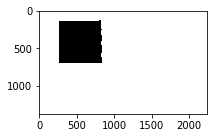

Min: 0
Max: 255
Mean: 228.7527549246417
Component 7:  0.04977029096477795


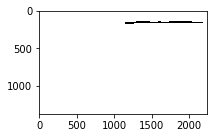

Min: 0
Max: 255
Mean: 252.83609102838133
Component 8:  0.06070826306913996


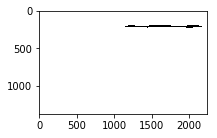

Min: 0
Max: 255
Mean: 252.70144928103068
Component 9:  0.09846153846153846


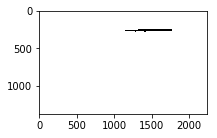

Min: 0
Max: 255
Mean: 253.63471605942618
Component 10:  0.053497942386831275


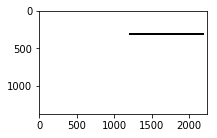

Min: 0
Max: 255
Mean: 252.7482414438445
Component 11:  0.06694214876033058


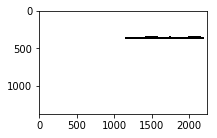

Min: 0
Max: 255
Mean: 252.9229432666415
Component 12:  1.25


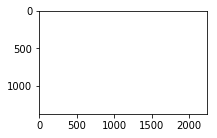

Min: 0
Max: 255
Mean: 254.99850398058499
Component 13:  0.05801772763900081


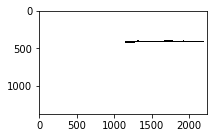

Min: 0
Max: 255
Mean: 253.011790197455
Component 14:  1.25


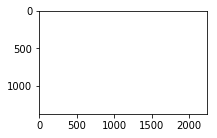

Min: 0
Max: 255
Mean: 254.99858709277473
Component 15:  0.05258467023172905


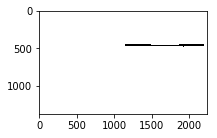

Min: 0
Max: 255
Mean: 252.69995326161566
Component 16:  0.06919275123558484


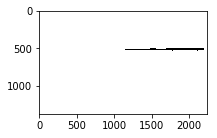

Min: 0
Max: 255
Mean: 252.91188934540838
Component 17:  0.05541125541125541


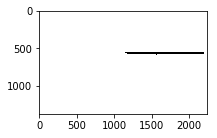

Min: 0
Max: 255
Mean: 252.68399572118892
Component 18:  0.08608058608058608


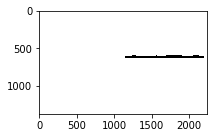

Min: 0
Max: 255
Mean: 252.86002733902146
Component 19:  0.04212299915754002


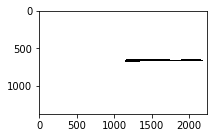

Min: 0
Max: 255
Mean: 252.53987918420987
Component 20:  1.0


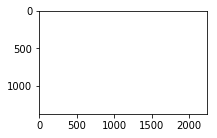

Min: 0
Max: 255
Mean: 254.9999168878103
Component 21:  0.08384458077709611


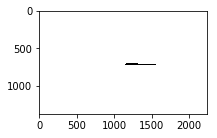

Min: 0
Max: 255
Mean: 254.1696261124811
Component 22:  0.7407407407407407


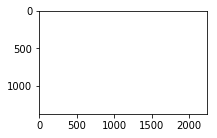

Min: 0
Max: 255
Mean: 254.98986031285384
Component 23:  0.0497335701598579


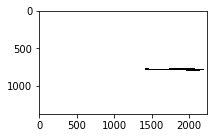

Min: 0
Max: 255
Mean: 253.41139360564145
Component 24:  0.5255474452554745


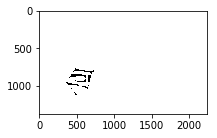

Min: 0
Max: 255
Mean: 253.18084039135087
Component 25:  0.3302752293577982


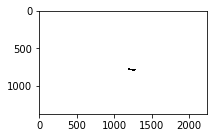

Min: 0
Max: 255
Mean: 254.77966958504527
Component 26:  0.10991957104557641


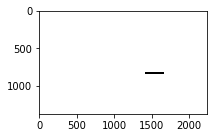

Min: 0
Max: 255
Mean: 254.40549850691394
Component 27:  1.0


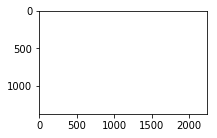

Min: 0
Max: 255
Mean: 254.9999168878103
Component 28:  0.0640074211502783


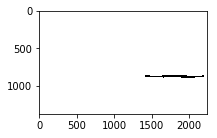

Min: 0
Max: 255
Mean: 253.37075174486708
Component 29:  0.24861878453038674


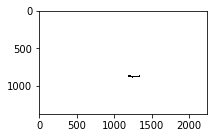

Min: 0
Max: 255
Mean: 254.71650432085607
Component 30:  1.1428571428571428


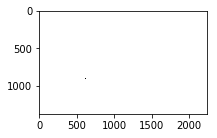

Min: 0
Max: 255
Mean: 254.99576127832415
Component 31:  0.10275689223057644


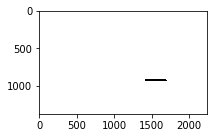

Min: 0
Max: 255
Mean: 254.2249788308364
Component 32:  0.06835443037974684


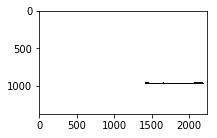

Min: 0
Max: 255
Mean: 253.54786382116603
Component 33:  1.0


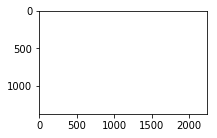

Min: 0
Max: 255
Mean: 254.99833775620556
Component 34:  0.19576719576719576


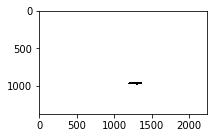

Min: 0
Max: 255
Mean: 254.56773350125255
Component 35:  1.1764705882352942


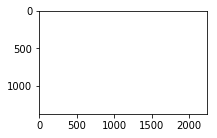

Min: 0
Max: 255
Mean: 254.99218745416607
Component 36:  0.13333333333333333


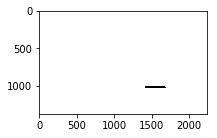

Min: 0
Max: 255
Mean: 254.32222009281188
Component 37:  0.0527363184079602


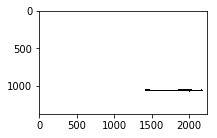

Min: 0
Max: 255
Mean: 253.44505404247914
Component 38:  0.18048780487804877


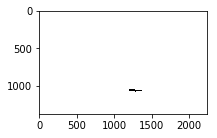

Min: 0
Max: 255
Mean: 254.65516752484078
Component 39:  1.2666666666666666


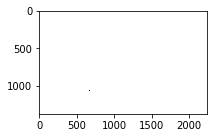

Min: 0
Max: 255
Mean: 254.990109649423
Component 40:  0.10301507537688442


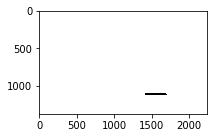

Min: 0
Max: 255
Mean: 254.2507436096504
Component 41:  0.07432432432432433


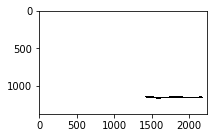

Min: 0
Max: 255
Mean: 253.40549264017116
Component 42:  1.0


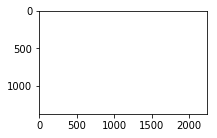

Min: 0
Max: 255
Mean: 254.99833775620556
Component 43:  0.19078947368421054


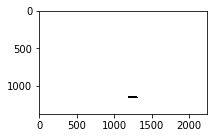

Min: 0
Max: 255
Mean: 254.70470238991547
Component 44:  0.7


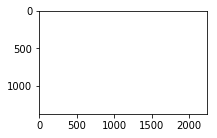

Min: 0
Max: 255
Mean: 254.98977720066412
Component 45:  7.0


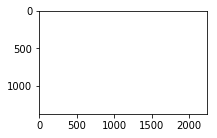

Min: 0
Max: 255
Mean: 254.99941821467195
Component 46:  7.0


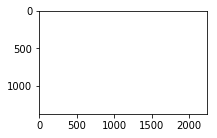

Min: 0
Max: 255
Mean: 254.99941821467195
Component 47:  1.0


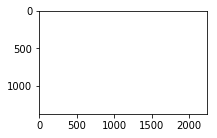

Min: 0
Max: 255
Mean: 254.9999168878103
Component 48:  0.08008658008658008


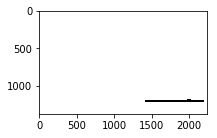

Min: 0
Max: 255
Mean: 253.38355102208436
Component 49:  0.08994708994708994


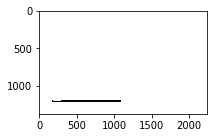

Min: 0
Max: 255
Mean: 253.5271688859251
Component 50:  1.0


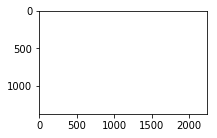

Min: 0
Max: 255
Mean: 254.99875331715415
Component 51:  0.33093525179856115


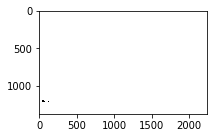

Min: 0
Max: 255
Mean: 254.87898865176385
Component 52:  0.37362637362637363


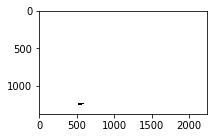

Min: 0
Max: 255
Mean: 254.87400192038046
Component 53:  0.08056872037914692


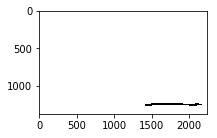

Min: 0
Max: 255
Mean: 253.2481612650262
Component 54:  1.0


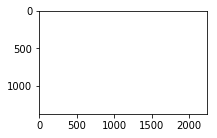

Min: 0
Max: 255
Mean: 254.9999168878103
Component 55:  1.0


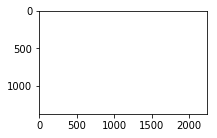

Min: 0
Max: 255
Mean: 254.99975066343083
Component 56:  0.06749740394600208


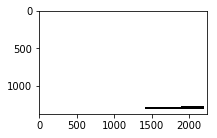

Min: 0
Max: 255
Mean: 253.4114767178312
Component 57:  0.09382716049382717


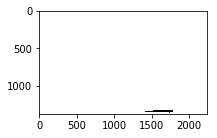

Min: 0
Max: 255
Mean: 254.1982998179354


In [17]:
for i in range(n_components):
    if h_transitions[i] != 0:
        print('Component %d: ' %(i+1), v_transitions[i]/h_transitions[i])
    else:
        print('Component %d: No white to black horizontal transition' %(i+1))
    window_indices = np.where(labels == i)
    temp = np.full(output6.shape,255)
    temp[window_indices] = 0

# print(temp)

    plot_image(temp)
        
v_h_ratio = v_transitions/h_transitions

**Passo 9:**  criação de uma regra para classificar cada componente conexo, de acordo com as medidas obtidas no
passo (8), como texto e não texto.


index =  35
v_h_ratio 0.13333333333333333


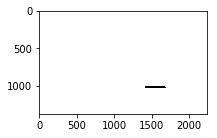

Min: 0
Max: 255
Mean: 254.32222009281188


In [18]:
import random
# index = random.randint(a=0,b=59)
index = 35
print('index = ',index)
print('v_h_ratio', v_h_ratio[index])
window_indices = np.where(labels == index)
temp = np.full(output6.shape,255)
temp[window_indices] = 0

# print(temp)

plot_image(temp)

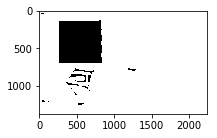

Min: 0
Max: 255
Mean: 226.34300009582347


True

In [19]:
# Define a th to classify the connected components either as figure or text
th = 0.3
v_h_ratio[0] = 0
v_h_ratio = np.where(v_h_ratio==np.nan,0,v_h_ratio)
text_indices = np.where(v_h_ratio > th)

temp = np.full(output6.shape,255)
text_indices = np.array(text_indices).reshape(-1,1)
for index in text_indices:
    window_indices = np.where(labels == index)
    temp[window_indices] = 0
plot_image(temp)

cv2.imwrite('png_images/step9.png', temp.astype('uint8'))

Text(0,0.5,'razão entre o número de transições verticais e horizontais')

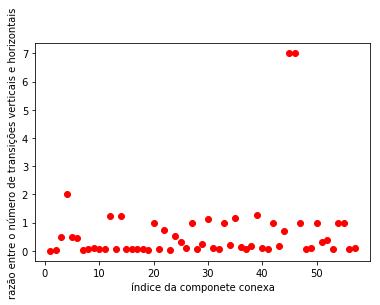

In [20]:
plt.plot(np.arange(1,58), np.array(v_h_ratio).reshape(-1,1), 'ro')
plt.xlabel('índice da componete conexa')
plt.ylabel('razão entre o número de transições verticais e horizontais')


**Passo 10:** aplicação de operadores morfol ́ogicos apropriados para segmentar cada linha do texto em blocos depalavras.  Coloque um retˆangulo envolvendo cada palavra na imagem original.  Calcule o n ́umero totalde linhas de texto e de blocos de palavras na imagem

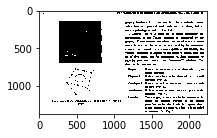

Min: 0
Max: 1
Mean: 0.7911547118744829
Number of connected components: 350


In [21]:
s_e10  = np.ones((1,11))
output1 = morphology.binary_dilation(image,s_e10)
output2 = morphology.binary_erosion(output1,s_e10)
s_e3 = np.ones((200,1))
output3 = morphology.binary_dilation(image,s_e3)
output4 = morphology.binary_erosion(output3,s_e3)
output5 = np.logical_and(output2, output4)
output5 = np.where(output5 == 0, 1, 0)
plot_image(output5)
retval, labels, stats, centroids = connectedComponentsWithStats(output5.astype('uint8'),connectivity=4)
print('Number of connected components:', retval)

In [22]:
retval, labels, stats, centroids = connectedComponentsWithStats(output5.astype('uint8'),connectivity=4)
v_transitions, h_transitions = step8(output5.astype('int'), stats)
print('Number of connected components:', retval)

Number of connected components: 350


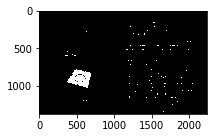

Min: 0
Max: 255
Mean: 5.178886765997141
36


In [23]:
# Define a th to classify the connected components either as figure or text
th = 0.5
# v_h_ratio[0] = 0
v_h_ratio = np.where(v_h_ratio==np.nan,np.inf,v_h_ratio)
text_indices = np.where(v_h_ratio < th)

temp = np.full(output6.shape,255)
text_indices = np.array(text_indices).reshape(-1,1)
for index in text_indices:
    window_indices = np.where(labels == index)
    temp[window_indices] = 0
plot_image(temp)

print(len(text_indices))
# cv2.imwrite('png_images/step10.png', temp.astype('uint8'))

In [24]:
print('Number of connected components:', retval)

Number of connected components: 350
